<a href="https://colab.research.google.com/github/RCaminero/artificial-lntelligence/blob/main/Real_Fake_Job_Posting_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing necessary libraries

In [1]:
import pandas as pd #data processing
import numpy as np #linear_algebra
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
import warnings
warnings.filterwarnings('ignore')
#Handling text 
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
#machine learning preprocessing & classification models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report,plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

# https://www.kaggle.com/code/hossamahmedaly/real-fake-jobs-classification-eda-nb-96/notebook

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive # We use that for use our content in drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/fake_job_postings.csv')
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [4]:
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']

In [5]:
for i in categories:
     x=df[i].value_counts()
     print (x.to_frame())

   telecommuting
0          17113
1            767
   has_company_logo
1             14220
0              3660
   has_questions
0           9088
1           8792
           employment_type
Full-time            11620
Contract              1524
Part-time              797
Temporary              241
Other                  227
                  required_experience
Mid-Senior level                 3809
Entry level                      2697
Associate                        2297
Not Applicable                   1116
Director                          389
Internship                        381
Executive                         141
                                   required_education
Bachelor's Degree                                5145
High School or equivalent                        2080
Unspecified                                      1397
Master's Degree                                   416
Associate Degree                                  274
Certification                                   

In [6]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

(array([5.00000e-01, 2.01500e+02, 4.02500e+02, 6.03500e+02, 8.04500e+02,
        1.00550e+03, 1.20650e+03, 1.40750e+03, 1.60850e+03, 1.80950e+03,
        2.01050e+03, 2.21150e+03, 2.41250e+03, 2.61350e+03, 2.81450e+03,
        3.01550e+03, 3.21650e+03, 3.41750e+03, 3.61850e+03, 3.81950e+03,
        4.02050e+03, 4.22150e+03, 4.42250e+03, 4.62350e+03, 4.82450e+03,
        5.02550e+03, 5.22650e+03, 5.42750e+03, 5.62850e+03, 5.82950e+03,
        6.03050e+03, 6.23150e+03, 6.43250e+03, 6.63350e+03, 6.83450e+03,
        7.03550e+03, 7.23650e+03, 7.43750e+03, 7.63850e+03, 7.83950e+03,
        8.04050e+03, 8.24150e+03, 8.44250e+03, 8.64350e+03, 8.84450e+03,
        9.04550e+03, 9.24650e+03, 9.44750e+03, 9.64850e+03, 9.84950e+03,
        1.00505e+04, 1.02515e+04, 1.04525e+04, 1.06535e+04, 1.08545e+04,
        1.10555e+04, 1.12565e+04, 1.14575e+04, 1.16585e+04, 1.18595e+04,
        1.20605e+04, 1.22615e+04, 1.24625e+04, 1.26635e+04, 1.28645e+04,
        1.30655e+04, 1.32665e+04, 1.34675e+04, 1.36

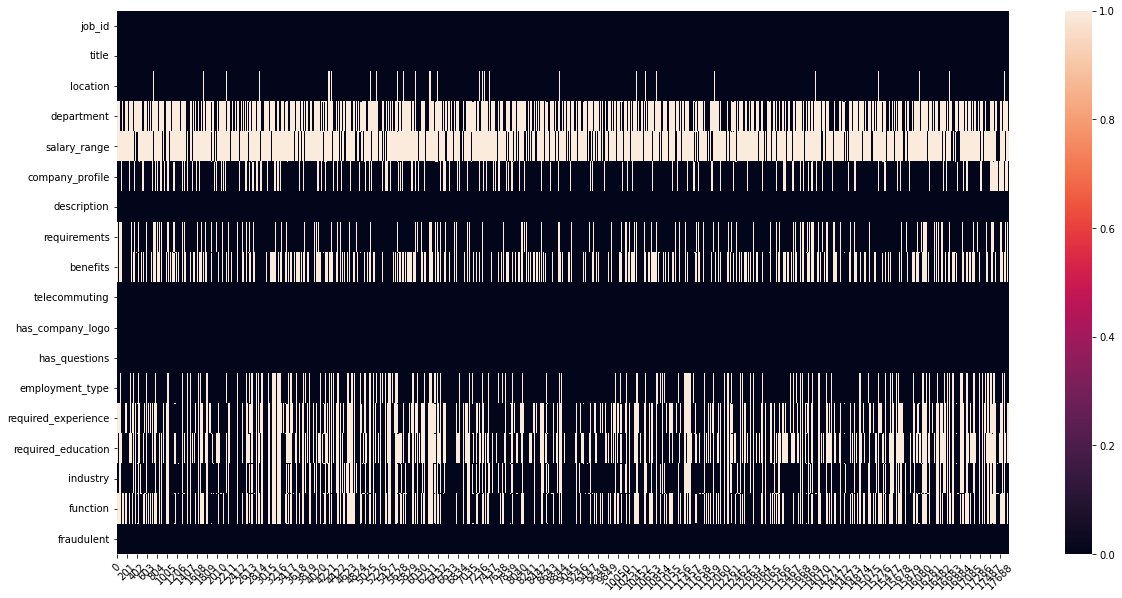

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna().transpose())
plt.xticks(rotation=45)

In [8]:
#Removing undesired columns & nan 
df.function.fillna(df.department,inplace=True)
df.drop(columns=['job_id','salary_range','department'],inplace=True)